In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #to train 80% and test 20%
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv("/home/pvg/Shruti/Regression_Data_set_Batch1.csv - Regression_Data_set_Batch1.csv.csv")
df = pd.DataFrame(data)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.shape

(545, 13)

In [ ]:
labelencoder = LabelEncoder()
df['mainroad'] = labelencoder.fit_transform(df['mainroad'])
df['guestroom'] = labelencoder.fit_transform(df['guestroom'])
df['basement'] = labelencoder.fit_transform(df['basement'])
df['hotwaterheating'] = labelencoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = labelencoder.fit_transform(df['airconditioning'])
df['prefarea'] = labelencoder.fit_transform(df['prefarea'])
df['furnishingstatus'] = labelencoder.fit_transform(df['furnishingstatus'])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
df_1=pd.DataFrame(scaled)
df_1.rename(columns={0:'price',1:'area',2:'bedrooms',3:'bathrooms',4:'stories',5:'mainroad',6:'guestroom',7:'basement',8:'hotwaterheating',9:'airconditioning',10:'parking',11:'prefarea',12:'furnishingstatus'},inplace=True)
df_1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
df_1.dtypes

price               float64
area                float64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad            float64
guestroom           float64
basement            float64
hotwaterheating     float64
airconditioning     float64
parking             float64
prefarea            float64
furnishingstatus    float64
dtype: object

In [ ]:
c=df_1.corr()
c

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


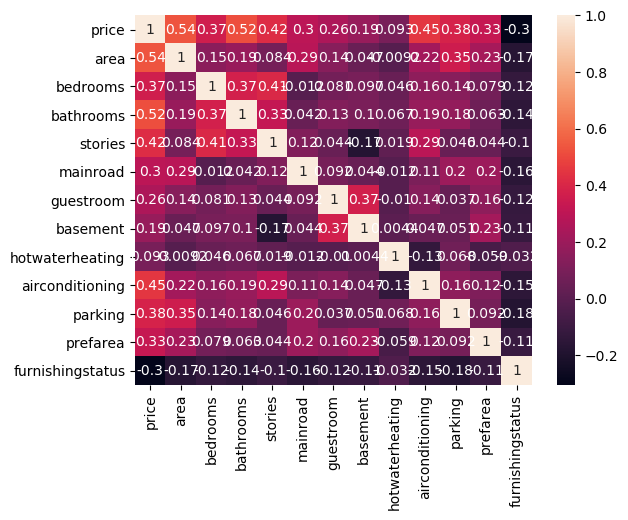

In [ ]:
sns.heatmap(c,annot=True)
plt.show()

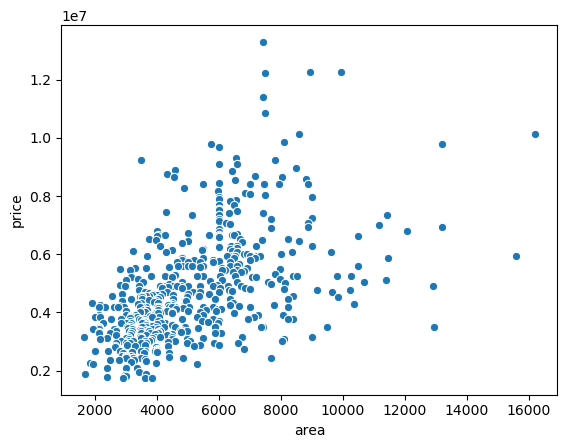

In [ ]:
sns.scatterplot(data=data,x="area",y="price")

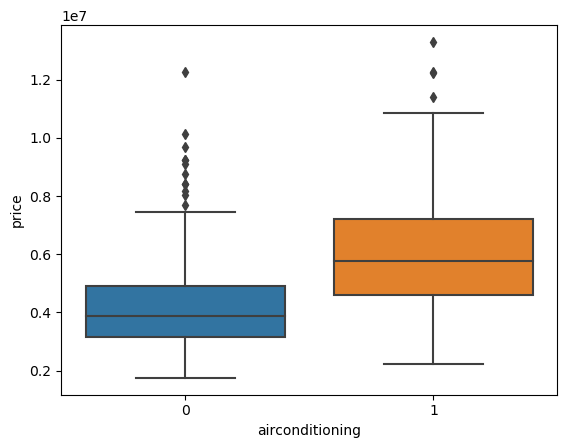

In [ ]:
sns.boxplot(x = 'airconditioning', y = 'price', data = data)

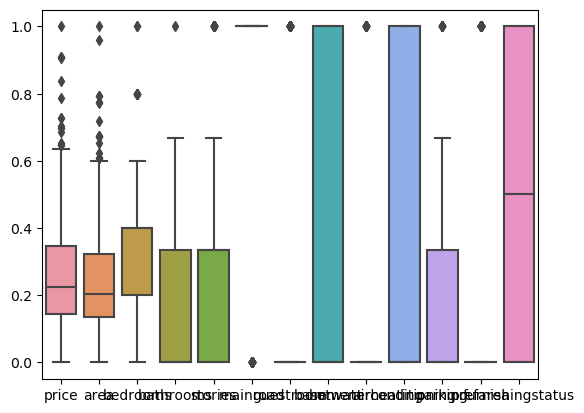

In [ ]:
sns.boxplot(data = df_1)

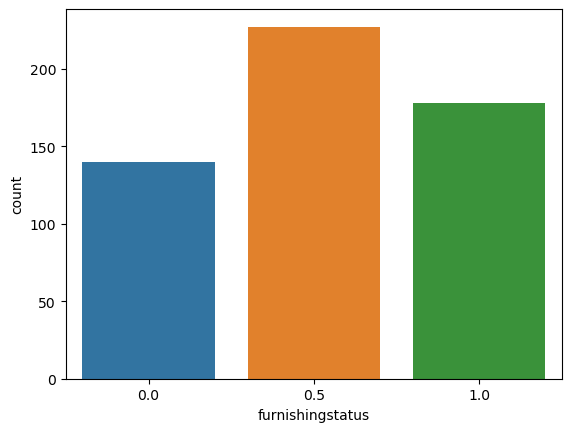

In [ ]:
sns.countplot(x=df_1["furnishingstatus"])

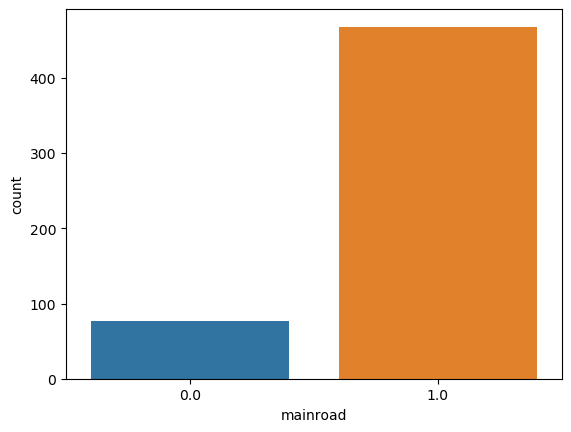

In [ ]:
sns.countplot(x=df_1["mainroad"])

In [ ]:
x = df_1.iloc[:,[1,2,3,4,9,10,11]].values
y = df_1.iloc[:,0].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.25,random_state=1)

In [ ]:
regr = LinearRegression()

In [ ]:
#X_train= np.reshape(x_train,(-1,1))
#X_test= np.reshape(x_test,(-1,1))

In [ ]:
regr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pre_test = regr.predict(x_test)
y_pre_train = regr.predict(x_train)

In [ ]:
regr.coef_ #beta0

array([0.31676571, 0.0295731 , 0.31349228, 0.12056736, 0.05666476,
       0.09205644, 0.06566045])

In [ ]:
regr.score(x_test,y_pre_test)

1.0

In [ ]:
regr.score(x_train,y_pre_train)

1.0

In [ ]:
mean_squared_error(y_test,y_pre_test)**0.5

0.10520325303274326

In [ ]:
mean_squared_error(y_train,y_pre_train)**0.5

0.09517286860933089

In [ ]:
r2_score(y_test,y_pre_test)

0.6269026968154725

In [ ]:
r2_score(y_train,y_pre_train)

0.6376574807026333